In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import datasets

In [3]:
sys.path.append("/home/aberhe/Projects/SANTAL/ASLR/src/")

In [4]:
import model_ner as ner_model

2023-10-11 15:39:20.613781: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-11 15:39:21.454257: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [60]:
datasets_path="/home/aberhe/Projects/SANTAL/ASLR/data/ner/Species_linnaeus_dataset_ner/"
#the path to the dataset, make sure your dataset have the "tokens" and "ner_token_tags" columns or you should specify the column names you want inside the code
#model_name should have a format "model_name/model_name" e.g. "AliBERT/AliBERT" which is a folder/model folder name
#tokenizer_name should have a format "tokenizer_name/tokenizer_name" e.g. "AliBERT/AliBERT" which is a folder/tokenizer folder name


In [61]:
dataset=datasets.load_from_disk(dataset_path=datasets_path)

In [42]:
args={"model_name":"allenai/scibert_scivocab_uncased",
      "tokenizer_name":"allenai/scibert_scivocab_uncased",
      "entity_type":"Species",
      "entity_list":["O","B-Disease","I-Disease"]}

In [8]:
label2Index={e:i for i,e in enumerate(args["entity_list"])}
index2Label={i:e for i,e in enumerate(args["entity_list"])}

In [9]:
index2Label

{0: 'O', 1: 'B', 2: 'I'}

In [10]:
label2Index

{'O': 0, 'B': 1, 'I': 2}

In [62]:
dataset

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 11935
    })
    valid: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 4078
    })
    test: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 7142
    })
})

In [67]:
print(dataset["train"][2]["tokens"])

['Scp160p', 'is', 'a', '160', 'kDa', 'protein', 'in', 'the', 'yeast', 'Saccharomyces', 'cerevisiae', 'that', 'contains', '14', 'repeats', 'of', 'the', 'hnRNP', 'K', '-', 'homology', '(KH)', 'domain', ',', 'and', 'demonstrates', 'significant', 'sequence', 'homology', 'to', 'a', 'family', 'of', 'proteins', 'collectively', 'known', 'as', 'vigilins', '.']


In [66]:
print(dataset["train"][2]["ner_tags"])

['O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'B\n', 'B\n', 'I\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n']


In [15]:
len(dataset["train"])

5424

In [17]:
print(dataset['train'][0]["tokens"])
print(dataset['train'][0]["ner_tags"])

['Identification', 'of', 'APC2', ',', 'a', 'homologue', 'of', 'the', 'adenomatous', 'polyposis', 'coli', 'tumour', 'suppressor', '.']
['O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'B-Disease\n', 'I-Disease\n', 'I-Disease\n', 'I-Disease\n', 'O\n', 'O\n']


In [28]:
entity_list=['O',"B-Disease","I-Disease"]
label2Index={e:i for i,e in enumerate(entity_list)}
index2Label={i:e for i,e in enumerate(entity_list)}

In [24]:
index2Label

{0: 'O', 1: 'B-Disease', 2: 'I-B-Disease'}

In [25]:
from tqdm import tqdm

In [4]:
def change_labels2Int(dataset,label2Index,split_name=["train","valid","test"]):
    dataset_list=[]
    for name in tqdm(split_name):
        labels=[]
        for i in range(len(dataset[name])):
            lbls=[]
            for j in range(len(dataset[name][i]["ner_tags"])):
                #print(dataset["train"][i]["ner_tags"][j].reaplace())
                lbls.append(label2Index[dataset[name][i]["ner_tags"][j].replace("\n","")])
                #dataset["train"][i]["ner_tokens_tags"][j]=label2Index[dataset["train"][i]["ner_tags"][j].replace("\n","")]
            labels.append(lbls)
        dataset_list.append(dataset[name].add_column("ner_token_tags",labels))
    print(len(dataset_list))
    ds=datasets.DatasetDict({"train":dataset_list[0],"valid":dataset_list[1],"test":dataset_list[2]})
    return ds 

In [30]:
ds=change_labels2Int(dataset=dataset,label2Index=label2Index)

100%|██████████| 3/3 [00:11<00:00,  3.84s/it]

3


In [31]:
ds

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags', 'ner_token_tags'],
        num_rows: 5424
    })
    valid: Dataset({
        features: ['tokens', 'ner_tags', 'ner_token_tags'],
        num_rows: 923
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'ner_token_tags'],
        num_rows: 940
    })
})

In [85]:
type(dataset_train)

datasets.arrow_dataset.Dataset

In [86]:
species_dataset1=datasets.DatasetDict({"train":dataset_train,"valid":dataset_valid,"test":dataset_test})

In [91]:
print(species_dataset["train"][0]["ner_token_tags"])

[1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [90]:
print(species_dataset["train"][0]["ner_tags"])

['B\n', 'I\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n']


In [36]:
ds.save_to_disk("/home/aberhe/Projects/SANTAL/ASLR/data/ner/Disease_NCBI-disease_dataset_ner_cleaned")

Saving the dataset (0/1 shards):   0%|          | 0/5424 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/923 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/940 [00:00<?, ? examples/s]

In [43]:
### Initializing the NER class with the model, tokenizer, list of entities
args["model_name"]="microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext"
args["tokenizer"]="microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext"
args["entity_list"]=entity_list

In [44]:
nlp_ner=ner_model.AlibertForTokenClassification(model_name=args["model_name"],tokenizer_name=args["tokenizer"],list_entities=args["entity_list"],train=True)

microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext


Some weights of BertForTokenClassification were not initialized from the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [45]:
datasets_path="/home/aberhe/Projects/SANTAL/ASLR/data/ner/Disease_NCBI-disease_dataset_ner_cleaned"

### Train the initialized ner model by passing the dataset path and saving mode (True will save the finetunned model)

In [46]:
nlp_ner.train_ner_model(dataset_path=datasets_path,save_mode=True)

Map:   0%|          | 0/5424 [00:00<?, ? examples/s]

Map:   0%|          | 0/923 [00:00<?, ? examples/s]

Map:   0%|          | 0/940 [00:00<?, ? examples/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss,O Precision,O Recall,O F1-score,O Support,I-disease Precision,I-disease Recall,I-disease F1-score,I-disease Support,B-disease Precision,B-disease Recall,B-disease F1-score,B-disease Support,Overall Accuracy,Macro Precision,Macro Recall,Macro F1-score
50,0.138700,0.121173,0.648202,0.696242,0.671364,958.000000,0.880616,0.549679,0.676862,1248.000000,0.978268,0.994815,0.986472,23530.000000,0.962115,0.835695,0.746912,0.778233
100,0.090100,0.072982,0.743379,0.849687,0.792986,958.000000,0.884859,0.782051,0.830285,1248.000000,0.989974,0.990310,0.990142,23530.000000,0.974977,0.872737,0.874016,0.871138
150,0.053500,0.060745,0.816306,0.867432,0.841093,958.000000,0.938078,0.813301,0.871245,1248.000000,0.989634,0.994093,0.991859,23530.000000,0.980611,0.914673,0.891609,0.901399
200,0.053700,0.057711,0.826772,0.876827,0.851064,958.000000,0.913191,0.859776,0.885679,1248.000000,0.992185,0.992818,0.992501,23530.000000,0.982048,0.910716,0.909807,0.909748
250,0.032600,0.055740,0.838485,0.877871,0.857726,958.000000,0.898539,0.887019,0.892742,1248.000000,0.993107,0.991883,0.992494,23530.000000,0.982554,0.910043,0.918924,0.914321
300,0.038800,0.054723,0.845842,0.870564,0.858025,958.000000,0.909472,0.869391,0.888980,1248.000000,0.992104,0.993243,0.992673,23530.000000,0.982670,0.915806,0.911066,0.913226


/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead u

In [47]:
nlp_ner.df_results

,Entity,Precision,Recall,F1_Score
0,O,0.885031,0.906003,0.895394
1,B-Disease,0.993842,0.990421,0.992128
2,I-Disease,0.872498,0.908179,0.889981
3,Over_all_macro,0.917124,0.934868,0.925835


### Results of test data: you can just use the df_results 

In [27]:
nlp_ner.df_results

,Entity,Precision,Recall,F1_Score
0,O,0.989259,0.993671,0.991460
1,B,0.849635,0.833811,0.841649
2,I,0.891841,0.759289,0.820244
3,Over_all_macro,0.910245,0.862257,0.884451


In [29]:
### Initializing the NER class with the model, tokenizer, list of entities
args["model_name"]="allenai/scibert_scivocab_uncased"
args["tokenizer"]="allenai/scibert_scivocab_uncased"
nlp_ner=ner_model.AlibertForTokenClassification(model_name=args["model_name"],tokenizer_name=args["tokenizer"],list_entities=args["entity_list"],train=True)
nlp_ner.train_ner_model(dataset_path=datasets_path,save_mode=True)
nlp_ner.df_results

allenai/scibert_scivocab_uncased


Some weights of BertForTokenClassification were not initialized from the model checkpoint at allenai/scibert_scivocab_uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/5733 [00:00<?, ? examples/s]

Map:   0%|          | 0/830 [00:00<?, ? examples/s]

Map:   0%|          | 0/830 [00:00<?, ? examples/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss,I Precision,I Recall,I F1-score,I Support,B Precision,B Recall,B F1-score,B Support,O Precision,O Recall,O F1-score,O Support,Overall Accuracy,Macro Precision,Macro Recall,Macro F1-score
50,0.091900,0.080999,0.682737,0.661145,0.671767,664.000000,0.721550,0.796791,0.757306,748.000000,0.987461,0.985122,0.986291,24063.000000,0.971148,0.797249,0.814353,0.805121
100,0.057300,0.068200,0.902552,0.585843,0.710502,664.000000,0.864507,0.784759,0.822705,748.000000,0.982598,0.994930,0.988726,24063.000000,0.978096,0.916552,0.788511,0.840644
150,0.074400,0.056381,0.793939,0.789157,0.791541,664.000000,0.808132,0.850267,0.828664,748.000000,0.990303,0.988863,0.989582,24063.000000,0.979588,0.864125,0.876096,0.869929
200,0.033500,0.057780,0.800307,0.784639,0.792395,664.000000,0.820972,0.858289,0.839216,748.000000,0.990600,0.989735,0.990167,24063.000000,0.980530,0.870626,0.877554,0.873926
250,0.044000,0.055688,0.804878,0.795181,0.800000,664.000000,0.814628,0.863636,0.838417,748.000000,0.991176,0.989652,0.990414,24063.000000,0.980883,0.870227,0.882823,0.876277
300,0.031700,0.057433,0.836806,0.725904,0.777419,664.000000,0.834688,0.823529,0.829071,748.000000,0.987666,0.991688,0.989673,24063.000000,0.979823,0.886387,0.847041,0.865388


/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead u

,Entity,Precision,Recall,F1_Score
0,O,0.987666,0.991688,0.989673
1,B,0.834688,0.823529,0.829071
2,I,0.836806,0.725904,0.777419
3,Over_all_macro,0.886387,0.847041,0.865388


In [69]:
dataset_chem=datasets.load_from_disk("/home/aberhe/Projects/SANTAL/ASLR/data/ner/Chemical_bc5cdr_dataset_ner_cleaned")

In [72]:
dataset_chem["train"][1]["ner_token_tags"]

[2,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2]

In [34]:
dataset_chem["train"][1]["ner_tags"]

['I-Chemical',
 'O',
 'O',
 'B-Chemical',
 'I-Chemical',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'I-Chemical',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'I-Chemical',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'I-Chemical',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'I-Chemical']

In [35]:
args["entity_list"]=["O",'B-Chemical','I-Chemical',]

In [36]:
label2Index={e:i for i,e in enumerate(args["entity_list"])}
index2Label={i:e for i,e in enumerate(args["entity_list"])}

In [37]:
ds=change_labels2Int(dataset=dataset_chem,label2Index=label2Index)

100%|██████████| 3/3 [01:08<00:00, 22.78s/it]

3


In [38]:
ds.save_to_disk("/home/aberhe/Projects/SANTAL/ASLR/data/ner/Chemical_bc5cdr_dataset_ner_cleaned")

Saving the dataset (0/1 shards):   0%|          | 0/499 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/499 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/499 [00:00<?, ? examples/s]

###  Running All models and Dataset Together!

In [14]:
path_datasets="/home/aberhe/Projects/SANTAL/ASLR/data/ner/"
dataset_names=["Chemical_bc5cdr_dataset_ner_cleaned","Disease_NCBI-disease_dataset_ner_cleaned","Species_s800_dataset_ner_cleaned"]

models=["allenai/scibert_scivocab_uncased","michiyasunaga/BioLinkBERT-base","microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext"]
tokenizers=["allenai/scibert_scivocab_uncased","michiyasunaga/BioLinkBERT-base","microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext"]

In [15]:
args={}

In [16]:
for i in dataset_names:
    data_ent=datasets.load_from_disk(os.path.join(path_datasets,i))

    if "test" in data_ent.column_names:
        print("Train \t Valid \t Test")
        print(f'{len(data_ent["train"])} \t  {len(data_ent["valid"])} \t {len(data_ent["test"])}\n')

Train 	 Valid 	 Test
499 	  499 	 499

Train 	 Valid 	 Test
5424 	  923 	 940

Train 	 Valid 	 Test
5733 	  830 	 830

Train 	 Valid 	 Test
11935 	  4078 	 7142



In [11]:
all_list_df=[]
for ds_name in dataset_names:
    list_df=[]
    for m,t in zip(models,tokenizers):
        print(m,t)
        args["model_name"]=m
        args["tokenizer_name"]=t
        args["entity_type"]=ds_name.split("_")[0]
        args["entity_list"]=["O","B","I"]

        datasets_path=os.path.join(path_datasets,ds_name)
        print(args)
        nlp_ner=ner_model.AlibertForTokenClassification(model_name=args["model_name"],tokenizer_name=args["tokenizer_name"],list_entities=args["entity_list"],train=True)
        nlp_ner.train_ner_model(dataset_path=datasets_path,save_mode=True)
        df=nlp_ner.df_results
        list_df.append(df)
    all_list_df.append(list_df)
        


allenai/scibert_scivocab_uncased allenai/scibert_scivocab_uncased
{'model_name': 'allenai/scibert_scivocab_uncased', 'tokenizer_name': 'allenai/scibert_scivocab_uncased', 'entity_type': 'Chemical', 'entity_list': ['O', 'B', 'I']}
allenai/scibert_scivocab_uncased


Some weights of BertForTokenClassification were not initialized from the model checkpoint at allenai/scibert_scivocab_uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/499 [00:00<?, ? examples/s]

Map:   0%|          | 0/499 [00:00<?, ? examples/s]

Map:   0%|          | 0/499 [00:00<?, ? examples/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss,I Precision,I Recall,I F1-score,I Support,B Precision,B Recall,B F1-score,B Support,O Precision,O Recall,O F1-score,O Support,Overall Accuracy,Macro Precision,Macro Recall,Macro F1-score
50,0.165400,0.155962,0.666933,0.516209,0.581970,3239.000000,0.834235,0.905367,0.868347,19750.000000,0.978416,0.967838,0.973098,88053.000000,0.943553,0.826528,0.796471,0.807805
100,0.068500,0.122884,0.792391,0.675208,0.729122,3239.000000,0.886335,0.923494,0.904533,19750.000000,0.981130,0.977241,0.979181,88053.000000,0.958871,0.886619,0.858648,0.870945
150,0.032800,0.136939,0.748690,0.793764,0.770568,3239.000000,0.892960,0.929266,0.910751,19750.000000,0.985044,0.973879,0.979430,88053.000000,0.960691,0.875564,0.898970,0.886916
200,0.018400,0.157417,0.763118,0.785736,0.774262,3239.000000,0.878890,0.941013,0.908891,19750.000000,0.986795,0.970075,0.978364,88053.000000,0.959529,0.876268,0.898941,0.887172
250,0.013900,0.156825,0.777000,0.788515,0.782715,3239.000000,0.897425,0.935139,0.915894,19750.000000,0.985076,0.975254,0.980140,88053.000000,0.962672,0.886500,0.899636,0.892916
300,0.011500,0.162399,0.768886,0.794998,0.781724,3239.000000,0.893819,0.937266,0.915027,19750.000000,0.985905,0.973925,0.979878,88053.000000,0.962185,0.882870,0.902063,0.892210


/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead u

michiyasunaga/BioLinkBERT-base michiyasunaga/BioLinkBERT-base
{'model_name': 'michiyasunaga/BioLinkBERT-base', 'tokenizer_name': 'michiyasunaga/BioLinkBERT-base', 'entity_type': 'Chemical', 'entity_list': ['O', 'B', 'I']}
michiyasunaga/BioLinkBERT-base


Some weights of BertForTokenClassification were not initialized from the model checkpoint at michiyasunaga/BioLinkBERT-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/499 [00:00<?, ? examples/s]

Map:   0%|          | 0/499 [00:00<?, ? examples/s]

Map:   0%|          | 0/499 [00:00<?, ? examples/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss,I Precision,I Recall,I F1-score,I Support,B Precision,B Recall,B F1-score,B Support,O Precision,O Recall,O F1-score,O Support,Overall Accuracy,Macro Precision,Macro Recall,Macro F1-score
50,0.225200,0.184793,0.694805,0.038269,0.072542,2796.000000,0.725284,0.886835,0.797965,14766.000000,0.975226,0.967926,0.971562,86424.000000,0.931414,0.798439,0.631010,0.614023
100,0.108100,0.125031,0.750000,0.595494,0.663876,2796.000000,0.832267,0.916362,0.872292,14766.000000,0.984341,0.973908,0.979096,86424.000000,0.955561,0.855536,0.828588,0.838421
150,0.065700,0.114364,0.737118,0.803290,0.768783,2796.000000,0.877306,0.911350,0.894004,14766.000000,0.985783,0.976384,0.981061,86424.000000,0.962495,0.866736,0.897008,0.881283
200,0.041600,0.114886,0.765449,0.801860,0.783231,2796.000000,0.887271,0.912028,0.899479,14766.000000,0.985037,0.978825,0.981921,86424.000000,0.964582,0.879252,0.897571,0.888211
250,0.036700,0.119257,0.774205,0.809371,0.791397,2796.000000,0.885223,0.914059,0.899410,14766.000000,0.985271,0.978339,0.981793,86424.000000,0.964668,0.881566,0.900590,0.890867
300,0.029400,0.121844,0.768375,0.815093,0.791045,2796.000000,0.883634,0.917445,0.900223,14766.000000,0.986066,0.977680,0.981855,86424.000000,0.964755,0.879358,0.903406,0.891041


/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead u

microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext
{'model_name': 'microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext', 'tokenizer_name': 'microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext', 'entity_type': 'Chemical', 'entity_list': ['O', 'B', 'I']}
microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext


Some weights of BertForTokenClassification were not initialized from the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/499 [00:00<?, ? examples/s]

Map:   0%|          | 0/499 [00:00<?, ? examples/s]

Map:   0%|          | 0/499 [00:00<?, ? examples/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss,I Precision,I Recall,I F1-score,I Support,B Precision,B Recall,B F1-score,B Support,O Precision,O Recall,O F1-score,O Support,Overall Accuracy,Macro Precision,Macro Recall,Macro F1-score
50,0.216600,0.181767,0.647355,0.087863,0.154726,2925.000000,0.769198,0.876325,0.819274,16608.000000,0.970487,0.972888,0.971686,86898.000000,0.933497,0.795680,0.645692,0.648562
100,0.093800,0.121587,0.789992,0.658462,0.718255,2925.000000,0.867461,0.911910,0.889130,16608.000000,0.981741,0.977629,0.979681,86898.000000,0.958602,0.879731,0.849333,0.862355
150,0.055500,0.122189,0.728741,0.817436,0.770545,2925.000000,0.889816,0.912211,0.900874,16608.000000,0.984847,0.976075,0.980442,86898.000000,0.961750,0.867801,0.901907,0.883954
200,0.035700,0.133694,0.736988,0.818120,0.775437,2925.000000,0.878061,0.928288,0.902476,16608.000000,0.987632,0.973175,0.980351,86898.000000,0.961910,0.867561,0.906528,0.886088
250,0.030700,0.141260,0.738066,0.824615,0.778944,2925.000000,0.872846,0.933285,0.902054,16608.000000,0.988490,0.971507,0.979925,86898.000000,0.961506,0.866467,0.909802,0.886974
300,0.023500,0.135308,0.758059,0.828034,0.791503,2925.000000,0.888217,0.928167,0.907753,16608.000000,0.987261,0.975707,0.981450,86898.000000,0.964230,0.877846,0.910636,0.893569


/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead u

allenai/scibert_scivocab_uncased allenai/scibert_scivocab_uncased
{'model_name': 'allenai/scibert_scivocab_uncased', 'tokenizer_name': 'allenai/scibert_scivocab_uncased', 'entity_type': 'Disease', 'entity_list': ['O', 'B', 'I']}
allenai/scibert_scivocab_uncased


Some weights of BertForTokenClassification were not initialized from the model checkpoint at allenai/scibert_scivocab_uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/5424 [00:00<?, ? examples/s]

Map:   0%|          | 0/923 [00:00<?, ? examples/s]

Map:   0%|          | 0/940 [00:00<?, ? examples/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss,I Precision,I Recall,I F1-score,I Support,B Precision,B Recall,B F1-score,B Support,O Precision,O Recall,O F1-score,O Support,Overall Accuracy,Macro Precision,Macro Recall,Macro F1-score
50,0.116700,0.095332,0.756125,0.665686,0.708029,1020.000000,0.860465,0.742199,0.796968,1346.000000,0.980904,0.993294,0.987060,24305.000000,0.968093,0.865831,0.800393,0.830686
100,0.075600,0.062078,0.814745,0.845098,0.829644,1020.000000,0.925801,0.815750,0.867299,1346.000000,0.989151,0.994116,0.991628,24305.000000,0.979416,0.909899,0.884988,0.896190
150,0.057400,0.055437,0.837476,0.858824,0.848015,1020.000000,0.941127,0.831352,0.882840,1346.000000,0.989360,0.994692,0.992019,24305.000000,0.981253,0.922654,0.894956,0.907625
200,0.034300,0.053348,0.831502,0.890196,0.859848,1020.000000,0.946399,0.839525,0.889764,1346.000000,0.991511,0.994775,0.993140,24305.000000,0.982940,0.923137,0.908165,0.914251
250,0.032600,0.052181,0.853107,0.888235,0.870317,1020.000000,0.932401,0.891530,0.911508,1346.000000,0.993010,0.993705,0.993358,24305.000000,0.984515,0.926173,0.924490,0.925061
300,0.035600,0.051802,0.855641,0.877451,0.866409,1020.000000,0.937052,0.873700,0.904268,1346.000000,0.992162,0.994816,0.993487,24305.000000,0.984215,0.928285,0.915322,0.921388


/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead u

michiyasunaga/BioLinkBERT-base michiyasunaga/BioLinkBERT-base
{'model_name': 'michiyasunaga/BioLinkBERT-base', 'tokenizer_name': 'michiyasunaga/BioLinkBERT-base', 'entity_type': 'Disease', 'entity_list': ['O', 'B', 'I']}
michiyasunaga/BioLinkBERT-base


Some weights of BertForTokenClassification were not initialized from the model checkpoint at michiyasunaga/BioLinkBERT-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/5424 [00:00<?, ? examples/s]

Map:   0%|          | 0/923 [00:00<?, ? examples/s]

Map:   0%|          | 0/940 [00:00<?, ? examples/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss,I Precision,I Recall,I F1-score,I Support,B Precision,B Recall,B F1-score,B Support,O Precision,O Recall,O F1-score,O Support,Overall Accuracy,Macro Precision,Macro Recall,Macro F1-score
50,0.152300,0.127047,0.675070,0.512766,0.582830,940.000000,0.750668,0.702500,0.725786,1200.000000,0.979807,0.992378,0.986052,23616.000000,0.961368,0.801848,0.735881,0.764889
100,0.099300,0.080506,0.753099,0.775532,0.764151,940.000000,0.882466,0.763333,0.818588,1200.000000,0.987958,0.993564,0.990753,23616.000000,0.974880,0.874508,0.844143,0.857831
150,0.064500,0.063869,0.798604,0.852128,0.824498,940.000000,0.916350,0.803333,0.856128,1200.000000,0.989832,0.993394,0.991610,23616.000000,0.979383,0.901595,0.882952,0.890745
200,0.053100,0.056686,0.800386,0.882979,0.839656,940.000000,0.921659,0.833333,0.875274,1200.000000,0.992130,0.992886,0.992508,23616.000000,0.981441,0.904725,0.903066,0.902479
250,0.040700,0.055391,0.803810,0.897872,0.848241,940.000000,0.918149,0.860000,0.888124,1200.000000,0.993300,0.991870,0.992584,23616.000000,0.982295,0.905086,0.916581,0.909650
300,0.046900,0.054826,0.805956,0.892553,0.847047,940.000000,0.919964,0.852500,0.884948,1200.000000,0.992840,0.992293,0.992567,23616.000000,0.982140,0.906253,0.912449,0.908187


/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead u

microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext
{'model_name': 'microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext', 'tokenizer_name': 'microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext', 'entity_type': 'Disease', 'entity_list': ['O', 'B', 'I']}
microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext


Some weights of BertForTokenClassification were not initialized from the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/5424 [00:00<?, ? examples/s]

Map:   0%|          | 0/923 [00:00<?, ? examples/s]

Map:   0%|          | 0/940 [00:00<?, ? examples/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss,I Precision,I Recall,I F1-score,I Support,B Precision,B Recall,B F1-score,B Support,O Precision,O Recall,O F1-score,O Support,Overall Accuracy,Macro Precision,Macro Recall,Macro F1-score
50,0.138700,0.121173,0.648202,0.696242,0.671364,958.000000,0.880616,0.549679,0.676862,1248.000000,0.978268,0.994815,0.986472,23530.000000,0.962115,0.835695,0.746912,0.778233
100,0.090100,0.072982,0.743379,0.849687,0.792986,958.000000,0.884859,0.782051,0.830285,1248.000000,0.989974,0.990310,0.990142,23530.000000,0.974977,0.872737,0.874016,0.871138
150,0.053500,0.060745,0.816306,0.867432,0.841093,958.000000,0.938078,0.813301,0.871245,1248.000000,0.989634,0.994093,0.991859,23530.000000,0.980611,0.914673,0.891609,0.901399
200,0.053700,0.057711,0.826772,0.876827,0.851064,958.000000,0.913191,0.859776,0.885679,1248.000000,0.992185,0.992818,0.992501,23530.000000,0.982048,0.910716,0.909807,0.909748
250,0.032600,0.055740,0.838485,0.877871,0.857726,958.000000,0.898539,0.887019,0.892742,1248.000000,0.993107,0.991883,0.992494,23530.000000,0.982554,0.910043,0.918924,0.914321
300,0.038800,0.054723,0.845842,0.870564,0.858025,958.000000,0.909472,0.869391,0.888980,1248.000000,0.992104,0.993243,0.992673,23530.000000,0.982670,0.915806,0.911066,0.913226


/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead u

allenai/scibert_scivocab_uncased allenai/scibert_scivocab_uncased
{'model_name': 'allenai/scibert_scivocab_uncased', 'tokenizer_name': 'allenai/scibert_scivocab_uncased', 'entity_type': 'Species', 'entity_list': ['O', 'B', 'I']}
allenai/scibert_scivocab_uncased


Some weights of BertForTokenClassification were not initialized from the model checkpoint at allenai/scibert_scivocab_uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/830 [00:00<?, ? examples/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss,I Precision,I Recall,I F1-score,I Support,B Precision,B Recall,B F1-score,B Support,O Precision,O Recall,O F1-score,O Support,Overall Accuracy,Macro Precision,Macro Recall,Macro F1-score
50,0.091900,0.080999,0.682737,0.661145,0.671767,664.000000,0.721550,0.796791,0.757306,748.000000,0.987461,0.985122,0.986291,24063.000000,0.971148,0.797249,0.814353,0.805121
100,0.057300,0.068200,0.902552,0.585843,0.710502,664.000000,0.864507,0.784759,0.822705,748.000000,0.982598,0.994930,0.988726,24063.000000,0.978096,0.916552,0.788511,0.840644
150,0.074400,0.056381,0.793939,0.789157,0.791541,664.000000,0.808132,0.850267,0.828664,748.000000,0.990303,0.988863,0.989582,24063.000000,0.979588,0.864125,0.876096,0.869929
200,0.033500,0.057780,0.800307,0.784639,0.792395,664.000000,0.820972,0.858289,0.839216,748.000000,0.990600,0.989735,0.990167,24063.000000,0.980530,0.870626,0.877554,0.873926
250,0.044000,0.055688,0.804878,0.795181,0.800000,664.000000,0.814628,0.863636,0.838417,748.000000,0.991176,0.989652,0.990414,24063.000000,0.980883,0.870227,0.882823,0.876277
300,0.031700,0.057433,0.836806,0.725904,0.777419,664.000000,0.834688,0.823529,0.829071,748.000000,0.987666,0.991688,0.989673,24063.000000,0.979823,0.886387,0.847041,0.865388


/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead u

michiyasunaga/BioLinkBERT-base michiyasunaga/BioLinkBERT-base
{'model_name': 'michiyasunaga/BioLinkBERT-base', 'tokenizer_name': 'michiyasunaga/BioLinkBERT-base', 'entity_type': 'Species', 'entity_list': ['O', 'B', 'I']}
michiyasunaga/BioLinkBERT-base


Some weights of BertForTokenClassification were not initialized from the model checkpoint at michiyasunaga/BioLinkBERT-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/5733 [00:00<?, ? examples/s]

Map:   0%|          | 0/830 [00:00<?, ? examples/s]

Map:   0%|          | 0/830 [00:00<?, ? examples/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss,I Precision,I Recall,I F1-score,I Support,B Precision,B Recall,B F1-score,B Support,O Precision,O Recall,O F1-score,O Support,Overall Accuracy,Macro Precision,Macro Recall,Macro F1-score
50,0.135500,0.104499,0.709677,0.250000,0.369748,616.000000,0.517518,0.723077,0.603267,715.000000,0.982513,0.987297,0.984899,23617.000000,0.961520,0.736569,0.653458,0.652638
100,0.067600,0.067723,0.870098,0.576299,0.693359,616.000000,0.752169,0.848951,0.797635,715.000000,0.986896,0.991743,0.989314,23617.000000,0.977393,0.869721,0.805664,0.826769
150,0.078700,0.058679,0.764516,0.769481,0.766990,616.000000,0.804318,0.833566,0.818681,715.000000,0.990842,0.989584,0.990213,23617.000000,0.979678,0.853226,0.864210,0.858628
200,0.041200,0.058164,0.743161,0.793831,0.767661,616.000000,0.795226,0.885315,0.837856,715.000000,0.992892,0.987721,0.990300,23617.000000,0.979998,0.843760,0.888956,0.865272
250,0.055200,0.051410,0.834798,0.771104,0.801688,616.000000,0.865356,0.800000,0.831395,715.000000,0.988911,0.993141,0.991021,23617.000000,0.982123,0.896355,0.854748,0.874702
300,0.036500,0.050813,0.856364,0.764610,0.807890,616.000000,0.848787,0.832168,0.840395,715.000000,0.989661,0.993014,0.991334,23617.000000,0.982764,0.898271,0.863264,0.879873


/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead u

microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext
{'model_name': 'microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext', 'tokenizer_name': 'microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext', 'entity_type': 'Species', 'entity_list': ['O', 'B', 'I']}
microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext


Some weights of BertForTokenClassification were not initialized from the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/5733 [00:00<?, ? examples/s]

Map:   0%|          | 0/830 [00:00<?, ? examples/s]

Map:   0%|          | 0/830 [00:00<?, ? examples/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss,I Precision,I Recall,I F1-score,I Support,B Precision,B Recall,B F1-score,B Support,O Precision,O Recall,O F1-score,O Support,Overall Accuracy,Macro Precision,Macro Recall,Macro F1-score
50,0.118700,0.093070,0.721133,0.534733,0.614100,619.000000,0.633333,0.707736,0.668471,698.000000,0.983912,0.987172,0.985539,23542.000000,0.968060,0.779459,0.743214,0.756037
100,0.063800,0.062800,0.897375,0.607431,0.724470,619.000000,0.866894,0.727794,0.791277,698.000000,0.982477,0.995497,0.988944,23542.000000,0.978318,0.915582,0.776907,0.834897
150,0.073000,0.049658,0.891304,0.728595,0.801778,619.000000,0.847432,0.803725,0.825000,698.000000,0.987717,0.993968,0.990833,23542.000000,0.982019,0.908818,0.842096,0.872537
200,0.033100,0.051003,0.796267,0.827141,0.811410,619.000000,0.857143,0.842407,0.849711,698.000000,0.991925,0.991420,0.991672,23542.000000,0.983145,0.881779,0.886989,0.884265
250,0.047300,0.046932,0.871972,0.814216,0.842105,619.000000,0.871118,0.803725,0.836066,698.000000,0.989762,0.993756,0.991755,23542.000000,0.983949,0.910951,0.870566,0.889975
300,0.033500,0.047307,0.889908,0.783522,0.833333,619.000000,0.862222,0.833811,0.847779,698.000000,0.989805,0.993883,0.991840,23542.000000,0.984151,0.913978,0.870405,0.890984


/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead u

In [5]:
datasets_path

NameError: name 'datasets_path' is not defined

In [12]:
len(all_list_df)

3

In [13]:
len(all_list_df[0])

3

In [14]:
all_list_df[0][0]

,Entity,Precision,Recall,F1_Score
0,O,0.986781,0.971618,0.979141
1,B,0.882523,0.940553,0.910614
2,I,0.737810,0.769674,0.753405
3,Over_all_macro,0.869038,0.893948,0.881054


In [17]:
all_list_df[0][0].add_prefix("PubMed-")

,PubMed-Entity,PubMed-Precision,PubMed-Recall,PubMed-F1_Score
0,O,0.986781,0.971618,0.979141
1,B,0.882523,0.940553,0.910614
2,I,0.737810,0.769674,0.753405
3,Over_all_macro,0.869038,0.893948,0.881054


In [38]:

for j in range(len(all_list_df)):
    df_list=[]
    for i in range(len(models)):
        pref=models[i].split("/")[-1].split("-")[0].split("_")[0]+"-"
        df_list.append(all_list_df[j][i].add_prefix(pref) )
    concat_df=pd.concat(df_list,axis=1,ignore_index=)
    concat_df.to_csv(dataset_names[j]+"NER_results.csv")

In [35]:
concat_df

,scibert-Entity,scibert-Precision,scibert-Recall,scibert-F1_Score,BioLinkBERT-Entity,BioLinkBERT-Precision,BioLinkBERT-Recall,BioLinkBERT-F1_Score,BiomedNLP-Entity,BiomedNLP-Precision,BiomedNLP-Recall,BiomedNLP-F1_Score
0,O,0.987666,0.991688,0.989673,O,0.989661,0.993014,0.991334,O,0.989805,0.993883,0.991840
1,B,0.834688,0.823529,0.829071,B,0.848787,0.832168,0.840395,B,0.862222,0.833811,0.847779
2,I,0.836806,0.725904,0.777419,I,0.856364,0.764610,0.807890,I,0.889908,0.783522,0.833333
3,Over_all_macro,0.886387,0.847041,0.865388,Over_all_macro,0.898271,0.863264,0.879873,Over_all_macro,0.913978,0.870405,0.890984


In [18]:
res_Chem=pd.read_csv(dataset_names[0]+"NER_results.csv")
res_Disease=pd.read_csv(dataset_names[1]+"NER_results.csv")
res_Species=pd.read_csv(dataset_names[2]+"NER_results.csv")

In [8]:
res_Chem.columns

Index(['Unnamed: 0', 'scibert-Entity', 'scibert-Precision', 'scibert-Recall',
       'scibert-F1_Score', 'BioLinkBERT-Entity', 'BioLinkBERT-Precision',
       'BioLinkBERT-Recall', 'BioLinkBERT-F1_Score', 'BiomedNLP-Entity',
       'BiomedNLP-Precision', 'BiomedNLP-Recall', 'BiomedNLP-F1_Score'],
      dtype='object')

In [19]:
res_Chem=res_Chem.drop(columns=['Unnamed: 0','BioLinkBERT-Entity','BiomedNLP-Entity'])

In [10]:
res_Chem.his

,scibert-Entity,scibert-Precision,scibert-Recall,scibert-F1_Score,BioLinkBERT-Precision,BioLinkBERT-Recall,BioLinkBERT-F1_Score,BiomedNLP-Precision,BiomedNLP-Recall,BiomedNLP-F1_Score
0,O,0.986781,0.971618,0.979141,0.988703,0.974631,0.981616,0.988820,0.971790,0.980231
1,B,0.882523,0.940553,0.910614,0.868459,0.933164,0.899650,0.871547,0.938460,0.903766
2,I,0.737810,0.769674,0.753405,0.745877,0.797696,0.770917,0.734351,0.814508,0.772355
3,Over_all_macro,0.869038,0.893948,0.881054,0.867679,0.901830,0.884061,0.864906,0.908252,0.885451


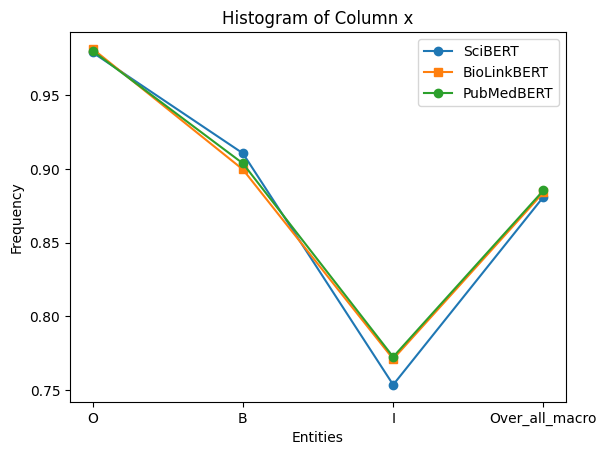

In [19]:
#plt.hist(res_Chem['scibert-Entity'], bins=5, edgecolor='black')  # You can adjust the number of bins as needed
plt.xlabel('Entities')
plt.ylabel('Frequency')
plt.title('Histogram of Column x')

# Show additional data as lines (y and z)
plt.plot(res_Chem['scibert-Entity'], res_Chem['scibert-F1_Score'], label='SciBERT', marker='o')
plt.plot(res_Chem['scibert-Entity'], res_Chem['BioLinkBERT-F1_Score'], label='BioLinkBERT', marker='s')
plt.plot(res_Chem['scibert-Entity'], res_Chem['BiomedNLP-F1_Score'], label='PubMedBERT', marker='o')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [24]:
def plotLineConnectes(df,entity_name="Chemical"):
    plt.xlabel('Entities')
    plt.ylabel('Score')
    plt.title(entity_name)

    # Show additional data as lines (y and z)
    plt.plot(df['scibert-Entity'], df['scibert-F1_Score'], label='SciBERT', marker='o')
    plt.plot(df['scibert-Entity'], df['BioLinkBERT-F1_Score'], label='BioLinkBERT', marker='s')
    plt.plot(df['scibert-Entity'], df['BiomedNLP-F1_Score'], label='PubMedBERT', marker='o')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

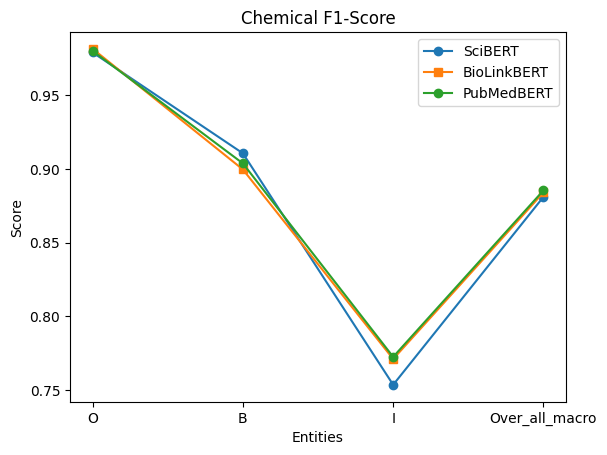

In [26]:
plotLineConnectes(res_Chem,entity_name="Chemical F1-Score")

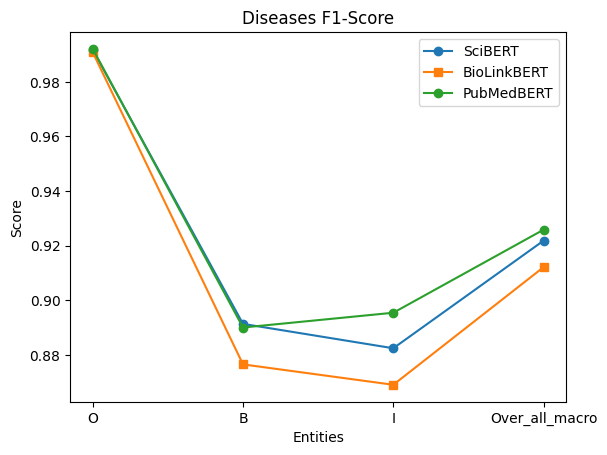

In [28]:
plotLineConnectes(res_Disease,entity_name="Diseases F1-Score")

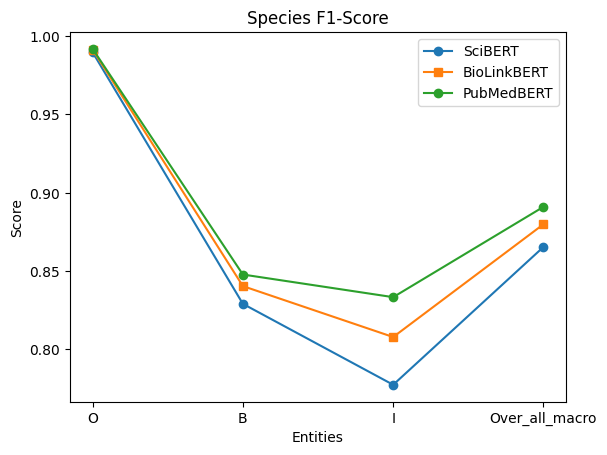

In [29]:
plotLineConnectes(res_Species,entity_name="Species F1-Score")

In [30]:
res_Disease.plot(["BiomedNLP-Precision","BiomedNLP-Recall","BiomedNLP-F1_Score"])

ValueError: x must be a label or position

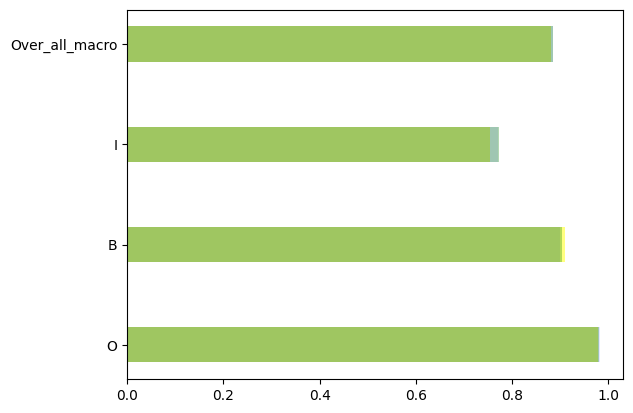

In [35]:
bar_width = 0.35
plt.barh(res_Chem['scibert-Entity'], res_Chem['scibert-F1_Score'], bar_width,label='SciBERT', color='yellow',alpha=0.5)
plt.barh(res_Chem['scibert-Entity'], res_Chem['BioLinkBERT-F1_Score'], bar_width, label='BioLinkBERT', color='blue',alpha=0.1)
plt.barh(res_Chem['scibert-Entity'], res_Chem['BiomedNLP-F1_Score'], bar_width, label='PubMedBERT', color='green',alpha=0.3)

# Show the plot
plt.show()

In [48]:
res_Disease12=res_Disease.drop(columns=["Unnamed: 0",'scibert-Entity', 'BioLinkBERT-Entity'])

<Axes: ylabel='BiomedNLP-Entity'>

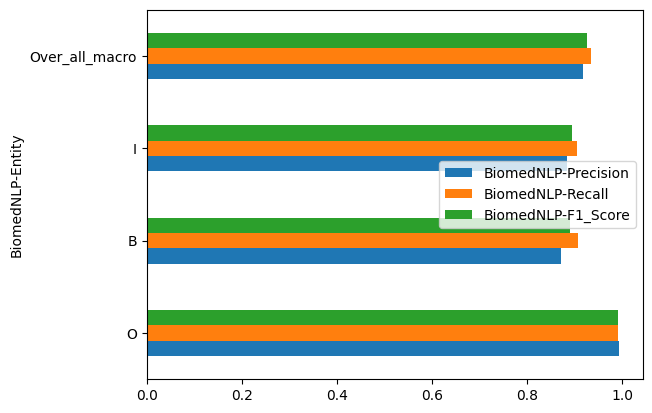

In [55]:
index=["O","B","I","Macro"]
res_Disease1.plot.barh(x="BiomedNLP-Entity")

<Axes: ylabel='BiomedNLP-Entity'>

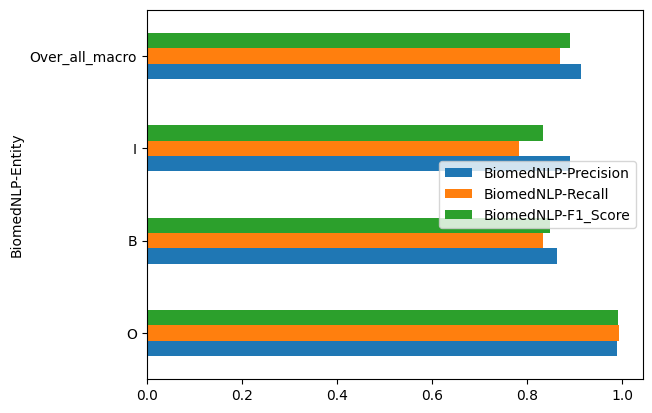

In [59]:
res_Spc1.plot.barh(x="BiomedNLP-Entity")

In [89]:
def plotHorizontal(df,entity_name="Chemical",column_x="scibert-Entity"):
    ax=df.plot.barh(x=column_x)
    ax.set_ylabel(entity_name+' Entities')
    ax.set_xlabel('Scores')  # Change the x-axis label
    legend = ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

    # Show the plot
    plt.show()

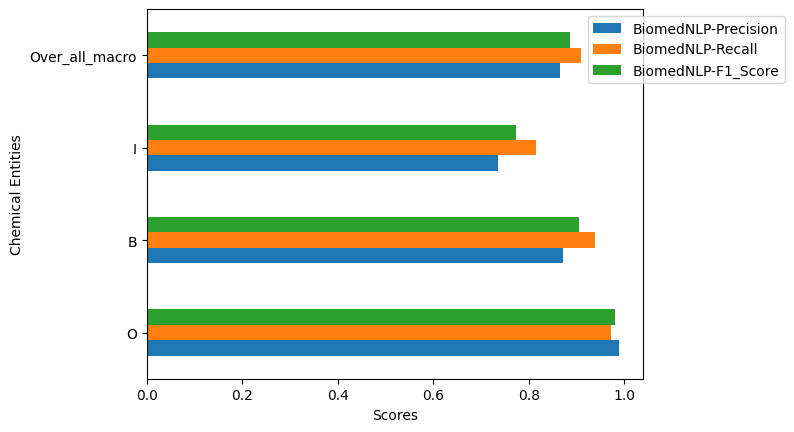

In [90]:
plotHorizontal(res_Chem1)

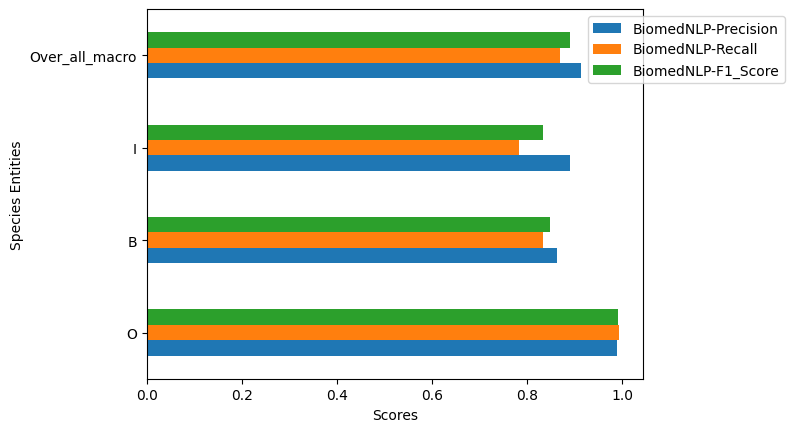

In [91]:
#res_Spc1=res_Spc1.drop(columns=["Unnamed: 0"])
plotHorizontal(res_Spc1,entity_name="Species",column_x="BiomedNLP-Entity")

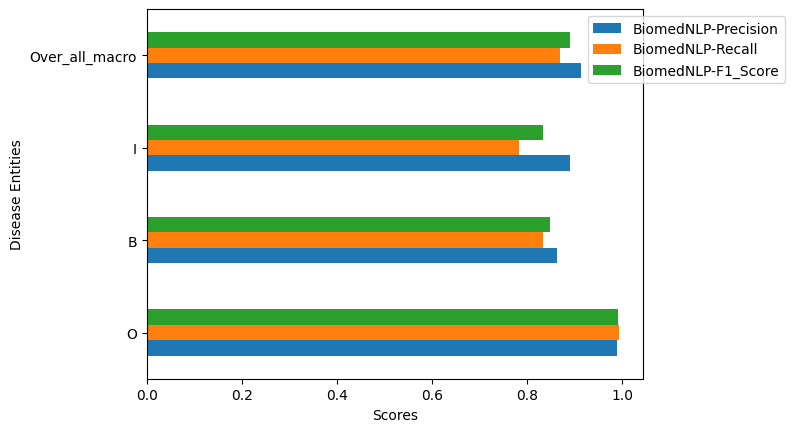

In [93]:
plotHorizontal(res_Spc1,entity_name="Disease",column_x="BiomedNLP-Entity")

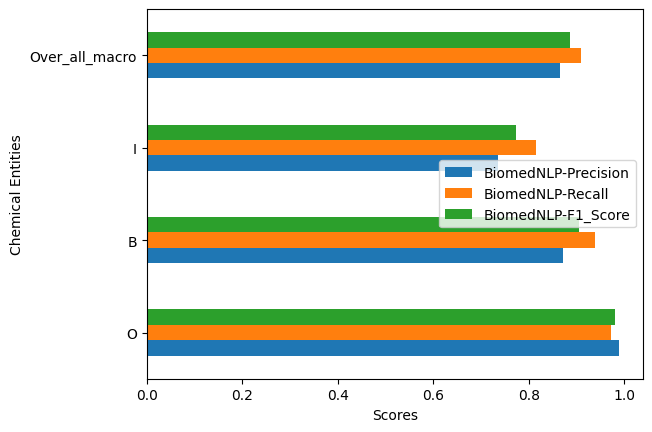

In [76]:
ax=res_Chem1.plot.barh(x="scibert-Entity",xlabel="Entities")
ax.set_ylabel('Chemical Entities')
ax.set_xlabel('Scores')  # Change the x-axis label

# Show the plot
plt.show()

In [72]:
res_Spc1

,Unnamed: 0,BiomedNLP-Entity,BiomedNLP-Precision,BiomedNLP-Recall,BiomedNLP-F1_Score
0,0,O,0.989805,0.993883,0.991840
1,1,B,0.862222,0.833811,0.847779
2,2,I,0.889908,0.783522,0.833333
3,3,Over_all_macro,0.913978,0.870405,0.890984


In [61]:
res_Spc1=res_Species.drop(columns=['scibert-Entity', 'scibert-Precision', 'scibert-Recall',
       'scibert-F1_Score', 'BioLinkBERT-Entity', 'BioLinkBERT-Precision',
       'BioLinkBERT-Recall', 'BioLinkBERT-F1_Score'])

In [92]:
res_Dis1=res_Disease.drop(columns=['scibert-Entity', 'scibert-Precision', 'scibert-Recall',
       'scibert-F1_Score', 'BioLinkBERT-Entity', 'BioLinkBERT-Precision',
       'BioLinkBERT-Recall', 'BioLinkBERT-F1_Score'])

In [64]:
res_Chem.columns

Index(['scibert-Entity', 'scibert-Precision', 'scibert-Recall',
       'scibert-F1_Score', 'BioLinkBERT-Precision', 'BioLinkBERT-Recall',
       'BioLinkBERT-F1_Score', 'BiomedNLP-Precision', 'BiomedNLP-Recall',
       'BiomedNLP-F1_Score'],
      dtype='object')

In [65]:
res_Chem1=res_Chem.drop(columns=['scibert-Precision', 'scibert-Recall',
       'scibert-F1_Score', 'BioLinkBERT-Precision',
       'BioLinkBERT-Recall', 'BioLinkBERT-F1_Score'])

In [38]:
res_Disease.columns

Index(['Unnamed: 0', 'scibert-Entity', 'scibert-Precision', 'scibert-Recall',
       'scibert-F1_Score', 'BioLinkBERT-Entity', 'BioLinkBERT-Precision',
       'BioLinkBERT-Recall', 'BioLinkBERT-F1_Score', 'BiomedNLP-Entity',
       'BiomedNLP-Precision', 'BiomedNLP-Recall', 'BiomedNLP-F1_Score'],
      dtype='object')

In [42]:
res_Species

,Unnamed: 0,scibert-Entity,scibert-Precision,scibert-Recall,scibert-F1_Score,BioLinkBERT-Entity,BioLinkBERT-Precision,BioLinkBERT-Recall,BioLinkBERT-F1_Score,BiomedNLP-Entity,BiomedNLP-Precision,BiomedNLP-Recall,BiomedNLP-F1_Score
0,0,O,0.987666,0.991688,0.989673,O,0.989661,0.993014,0.991334,O,0.989805,0.993883,0.991840
1,1,B,0.834688,0.823529,0.829071,B,0.848787,0.832168,0.840395,B,0.862222,0.833811,0.847779
2,2,I,0.836806,0.725904,0.777419,I,0.856364,0.764610,0.807890,I,0.889908,0.783522,0.833333
3,3,Over_all_macro,0.886387,0.847041,0.865388,Over_all_macro,0.898271,0.863264,0.879873,Over_all_macro,0.913978,0.870405,0.890984


In [14]:
plt.plot?

Signature:
plt.plot(
    *args: 'float | ArrayLike | str',
    scalex: 'bool' = True,
    scaley: 'bool' = True,
    data=None,
    **kwargs,
) -> 'list[Line2D]'
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yie